<a href="https://colab.research.google.com/github/Rohianon/Breast-Cancer/blob/main/breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Let's Set off with loading the required libraries and downloading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
uploaded = files.upload()
import io
wdbc = pd.read_csv(io.BytesIO(uploaded['datasets_180_408_data.csv']))
wdbc.head()

Saving datasets_180_408_data.csv to datasets_180_408_data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


A lil data description and undestanding

In [ ]:
def describedata(data):
    print(f'Dimensions = {data.shape}\n')
    try:
        print(f'Columns are: {list(data.columns)}\n')
        print(f'More infomation\n{"-*-"*20}\n')
        f'{data.info()}'
    except AttributeError as Abt:
        print('Info() & df.columns attributes applicable to dataframes only')
    print(f"Data Summary \n{'_-*'*20}\n")
    print(data.describe())
    print('Bye')


In [ ]:
describedata(wdbc)

Dimensions = (569, 33)

Columns are: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

More infomation
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non

Last column need to be worked on, We choose to drop it off since there is no entry in it.

In [ ]:
wdbc.drop(list(wdbc.columns)[-1], axis=1, inplace=True)
describedata(wdbc)

Dimensions = (569, 32)

Columns are: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

More infomation
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object

We can now separate the target from the predictors. Id is not a predictor in this case, we choose to drop it.

In [ ]:
X = wdbc.drop(['diagnosis','id'],axis=1)
y = wdbc.loc[:,'diagnosis']

In [ ]:
describedata(X)

Dimensions = (569, 30)

Columns are: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

More infomation
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_me

In [ ]:
describedata(y)

Dimensions = (569,)

Info() & df.columns attributes applicable to dataframes only
Data Summary 
_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object
Bye


Some bit of visualizations.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


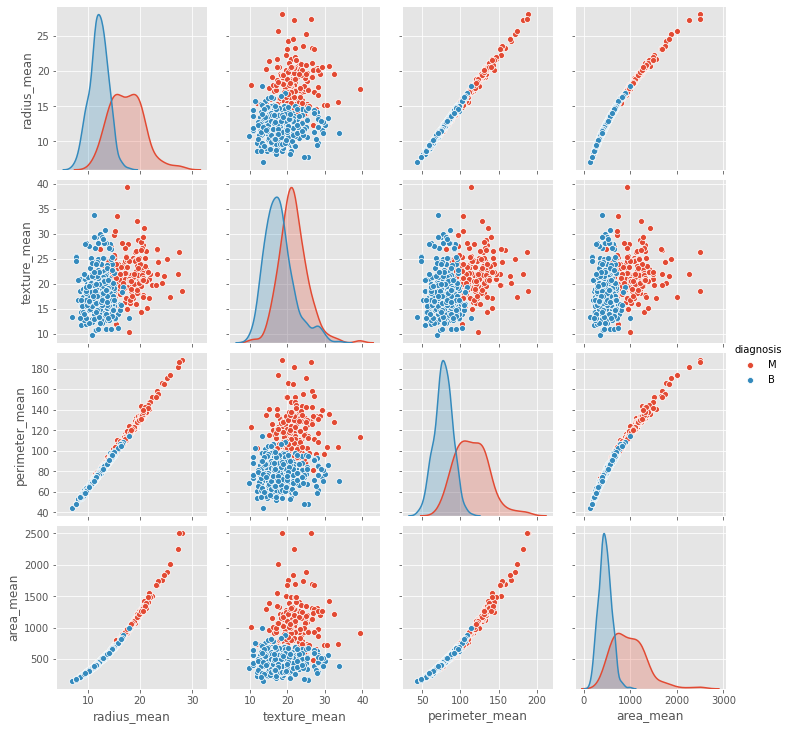

In [ ]:
import seaborn as sns
plt.style.use(['ggplot'])
sns.pairplot(wdbc.iloc[:,1:6],hue='diagnosis')

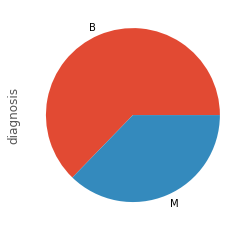

In [ ]:
y.value_counts().plot(kind='pie')

Correlation plots.

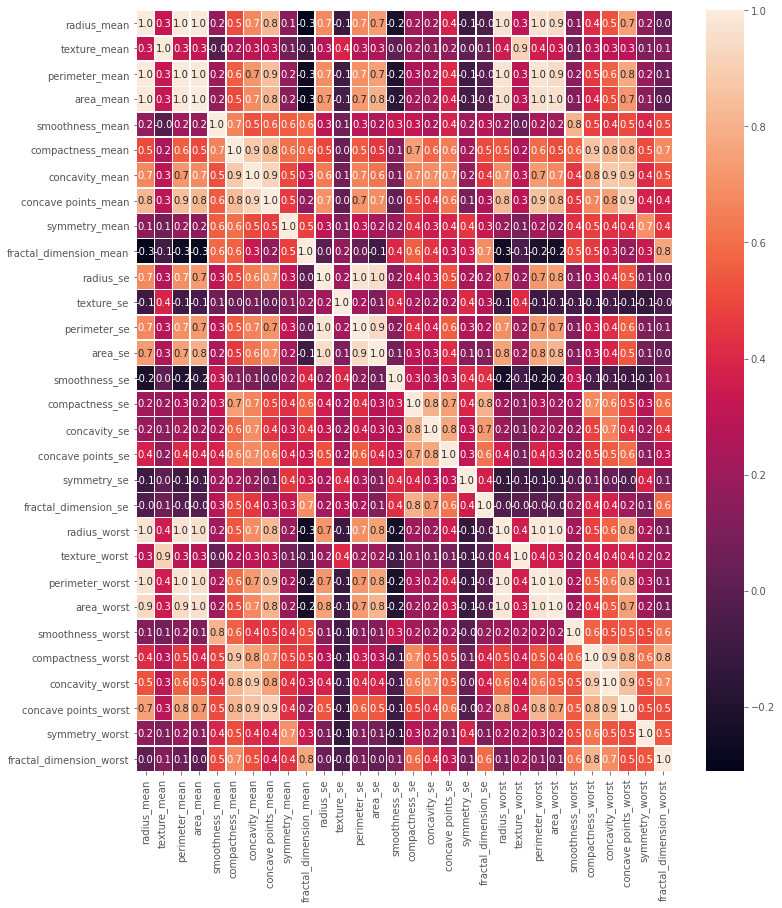

In [ ]:
fig, ax = plt.subplots(figsize=(12,14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax);

Count plot


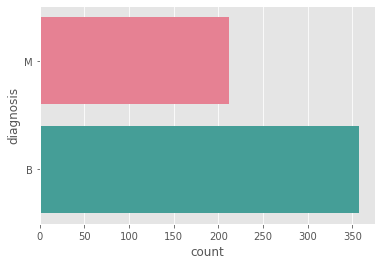

In [ ]:
sns.countplot(y=y,palette="husl")

Split dataset to test train split 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=47)

## Model Building processes.

1. Random Forest classsier.

In [ ]:
from sklearn.ensemble import  RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=1000, n_jobs=2000)
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2000, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#make predictions on the test and find the accuracy metrics
y_pred = rfclf.predict(X_test)

from sklearn.metrics import  accuracy_score, confusion_matrix

print(f'The accuracy using Random Forest is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy using Random Forest is:0.9649122807017544


array([[67,  3],
       [ 1, 43]])

2. Support Vector Machines Classifier

In [ ]:
from sklearn.svm import  SVC

svclf = SVC(C=10,random_state=49)
svclf.fit(X_train, y_train)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=49, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#make predictions on test set and find accuracy metrics
y_pred = svclf.predict(X_test)

print(f'The accuracy using Support Vectors is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy using Support Vectors is:0.9122807017543859


array([[66,  4],
       [ 6, 38]])

3. K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knclf = KNeighborsClassifier(n_neighbors=5,n_jobs=30,p=59)
knclf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=30, n_neighbors=5, p=59,
                     weights='uniform')

In [ ]:
#make predictions on test set and find accuracy metrics
y_pred = knclf.predict(X_test)

print(f'The accuracy using K-Neighbors is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy using K-Neighbors is:0.9298245614035088


array([[66,  4],
       [ 4, 40]])

4. Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()
nbclf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#make the predictions on the test set and finc accuracy metrics
y_pred = nbclf.predict(X_test)

print(f'The accuracy using Naive Bayes Clf is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy using Naive Bayes Clf is:0.9385964912280702


array([[66,  4],
       [ 3, 41]])

5. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#make the predictions on the test set and find the accuracy metrics
y_pred = dtclf.predict(X_test)

print(f'The accuracy using Decision Trees is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy using Decision Trees is:0.9035087719298246


array([[64,  6],
       [ 5, 39]])

From the above models, Random Forest performed the best while Support Vectors Performed somewhat poorly.

Let's repeat the model fitting using scaled data

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [ ]:
#1.decision tree
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_pred = dtclf.predict(X_test)
print(f'The accuracy using Decision Tree is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)


The accuracy using Decision Tree is:0.868421052631579


array([[62,  9],
       [ 6, 37]])

In [ ]:
#2. Random Forest
rfclf = RandomForestClassifier(n_estimators=1000, n_jobs=2000)
rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_test)
print(f'The accuracy using Random Forest is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy using Random Forest is:0.9473684210526315


array([[69,  2],
       [ 4, 39]])

In [ ]:
#3. Support Vector Machines
svclf = SVC()
svclf.fit(X_train,y_train)
y_pred = svclf.predict(X_test)
print(f'The accuracy using Support Vector Machines is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy using Support Vector Machines is:0.9824561403508771


array([[71,  0],
       [ 2, 41]])

In [ ]:
#4. K-Neighbors 
knclf = KNeighborsClassifier(n_neighbors=5, n_jobs=30, p=59)
knclf.fit(X_train,y_train)
y_pred = knclf.predict(X_test)
print(f'The accuracy using K-Neighbors is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy using K-Neighbors is:0.9298245614035088


array([[68,  3],
       [ 5, 38]])

In [ ]:
#5. Naive Bayes.
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)
y_pred = nbclf.predict(X_test)
print(f'The accuracy using Naive Bayes is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy using Naive Bayes is:0.956140350877193


array([[70,  1],
       [ 4, 39]])

In [ ]:
#6. Logisit regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(f'The accuracy using Logistic Regression is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy using Logistic Regression is:0.956140350877193


array([[69,  2],
       [ 3, 40]])

The best Classifier seems to be Logistic regression. 
When we tune SVM(C=10), we also find SVM to be equal to Logistic. 

In [ ]:
svclf1 = SVC(C=10)
svclf1.fit(X_train,y_train)
y_pred = svclf1.predict(X_test)
print(f'The accuracy using Support Vector with C=10 is:{accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy using Support Vector with C=10 is:0.9649122807017544


array([[69,  2],
       [ 2, 41]])

We can Further Get to Hyper Parameters for the DTree, SVM, KNN and RF.

In [ ]:
#tune Decision Tree Hyper parameters
from sklearn.model_selection import GridSearchCV
dtclf = DecisionTreeClassifier(random_state=4837)
params = {'max_features':['auto','sqrt','log2'],
          'min_samples_split':[4,5,7,8,9,2,45,67],
          'min_samples_leaf':[3,4,5,6,7,8,92],
          'random_state':range(10)}

#model with hyper parameters set
dtclf1 = GridSearchCV(dtclf,param_grid=params, n_jobs=-1)

dtclf1.fit(X_train, y_train)
print(f'Best Hyper Parameters:{dtclf1.best_params_}')

y_pred = dtclf1.predict(X_test)
print(f'The accuracy using Decision Tree is:{accuracy_score(y_test, y_pred)}')
print(f'Confusion Metric:\n{confusion_matrix(y_test, y_pred)}')

Best Hyper Parameters:{'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4, 'random_state': 2}
The accuracy using Decision Tree is:0.9035087719298246
Confusion Metric:
[[65  6]
 [ 5 38]]


In [ ]:
dtclf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4837, splitter='best')

In [ ]:
rs = np.arange(20)
params = dict(random_state = rs)
print(params)

{'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])}


In [ ]:
from sklearn.model_selection import cross_val_score


#nb
nbclf = GaussianNB()

scores = cross_val_score(nbclf,X,y, cv=5,scoring="accuracy")
print(scores)

[0.90350877 0.9122807  0.95614035 0.94736842 0.92035398]


In [ ]:
scores.mean()

0.927930445582984

In [ ]:
list(range(1,20))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
a = []
b = [6,7,10,12]

for k in b:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X,y, cv=5, scoring='accuracy')
    a.append((scores.std()))

TypeError: ignored

In [ ]:
a

[]

In [ ]:
neighbors = np.arange(1,20)
param_grid = dict(n_neighbors=neighbors, weights=['uniform','distance'])
print(param_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'weights': ['uniform', 'distance']}


In [ ]:
model = KNeighborsClassifier()

clf = GridSearchCV(model, param_grid=param_grid, cv=10, scoring='accuracy')
clf.fit(X,y)
print(clf.best_score_, clf.best_params_)

0.9683897243107771 {'n_neighbors': 7, 'weights': 'uniform'}


In [ ]:
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.00238357, 0.00212798, 0.00212469, 0.00211747, 0.00220792,
        0.00226378, 0.0022326 , 0.00231109, 0.0022526 , 0.00215449,
        0.0021677 , 0.0021548 , 0.00214233, 0.00219452, 0.00215571,
        0.00214336, 0.00215709, 0.00208449, 0.00211322, 0.00214937,
        0.00222473, 0.00223727, 0.00238328, 0.00208788, 0.00213935,
        0.0021323 , 0.00211389, 0.00211413, 0.00214765, 0.00211947,
        0.00213194, 0.00212727, 0.00214033, 0.00208931, 0.00211823,
        0.00214615, 0.00218692, 0.00214257]),
 'mean_score_time': array([0.00465958, 0.00286524, 0.00428355, 0.00287488, 0.00439668,
        0.00314326, 0.00464203, 0.00346286, 0.00466874, 0.00313244,
        0.00452747, 0.00308526, 0.00449514, 0.00313954, 0.00458679,
        0.00310607, 0.00456543, 0.00305219, 0.0045248 , 0.00316715,
        0.00465031, 0.00337515, 0.00500758, 0.00315974, 0.00464432,
        0.00325038, 0.00462933, 0.00320845, 0.0046958 , 0.00325818,
        0.00471902, 0.00332725, 0.

In [ ]:
clf = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=10, scoring='accuracy')
clf.fit(X,y)

print(clf.best_score_, clf.best_params_)

0.9683897243107771 {'weights': 'distance', 'n_neighbors': 7}


In [ ]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

## MAP Gaussian Classes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 


In [ ]:
def multivariate_normal(x, d, mean, covariance):
    "Pdf of the Multivariate normal Distribution"
    x_m = x- mean
    return (1. / (np.sqrt((2*np.pi)**d*np.linalg.det(covariance))) *
             np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m))/2))

In [ ]:
def generate_GMM_samples(prior, number_of_samples=400, sig1=[[1,0],[0,1]],
                         sig2=[[1,0],[0,1]], u1=[0,0], u2=[3,3]):
    '''
    Args:
    prior: Prior of class 1. (prior of class 2 = 1-prior(automatically))
    number_or_samples

    class 1- u_1, sig_1
    class 2- u_2, sig_2

    x is the samples from zero-mean identity-covariance Gaussian sample generators

    generating class 1- A1*x+b1
    generating class 2- A2*x+b2

    For map, we need to find un-normalized posterior - p(x|l=1)p(L=i). Let us call it check(i) for class i.

    check(L=1) = N(u_1, sig_1)*prior(L=1)
    check(L=2) = N(u_2, sig_2)*prior(L=2)

    Decision:
    class 1 if check(L=1)  is greater
    else:
        class 2

    count the total misclassifications for class 1 and class 2

    P(error) = Total errors/Total samples
             = Total errors/400

    '''
    from matplotlib.pyplot import figure

    txt = 'plot of data sampled from 2 gaussians. The red and blue markers\
    show the samplses miscalssifed by the MAP estimate'
    fig = plt.figure(figsize=(12,12));
    fig.text(0.05,0.025, txt, fontsize=15);
    samples_class1 = []
    samples_class2 = []
    sig_1 = np.matrix(sig1)
    sig_2 = np.matrix(sig2)
    u_1 = np.matrix(u1).transpose()
    u_2 = np.matrix(u2).transpose()
    prior = prior
    A1 = np.linalg.cholesky(sig_1)
    b1 = u_1

    A2 = np.linalg.cholesky(sig_2)
    b2 = u_2

    zero_mean = [0,0]
    cov = [[1,0], [0,1]]
    for i in range(number_of_samples):
        uniform_sample = np.random.uniform()

        sample_zero_mean_identity = np.random.multivariate_normal(zero_mean, cov, [1]).transpose()

        if uniform_sample < prior:
            '''Sample from class 1'''
            sample = A1.dot(sample_zero_mean_identity) + b1
            samples_class1.append(sample)

        else:
            sample = A2.dot(sample_zero_mean_identity) + b2
            samples_class2.append(sample)

    samples_class1_final = np.hstack(samples_class1)
    samples_class2_final = np.hstack(samples_class2)

    a = np.squeeze(np.asarray(samples_class1_final.transpose()[:,1]))
    b = np.squeeze(np.asarray(samples_class1_final.transpose()[:,0]))

    c = np.squeeze(np.asarray(samples_class2_final.transpose()[:,1]))
    d = np.squeeze(np.asarray(samples_class2_final.transpose()[:,0]))

    from matplotlib.pyplot import figure
    figure(figsize=(10,8))
    plt.scatter(b,a,label='1st Gaussian');
    plt.scatter(d,c,label='2nd Gaussian');

    plt.title('Plot of samples drawn from two 2D gaussians', fontsize=15)
    plt.xlabel('$X_1$',fontsize=12)
    plt.ylabel('$X_2$',fontsize=12)
    plt.legend()
    #plt.show()

    #estimate mean and varaince of samples
    sig1 = np.cov(samples_class1_final)
    sig2 = np.cov(samples_class2_final)
    u1 = np.mean(samples_class1_final,axis=1)
    u2 = np.mean(samples_class2_final,axis=1)

    sig_1 = np.matrix(sig1)
    sig_2 = np.matrix(sig2)

    u_1 = np.matrix(u1)#.transpose()
    u_2 = np.matrix(u2)#.transpose()


    #fisher's LDA math to find eigenvecotrs. Plot the origninal\
    #samples along eigenvector axes

    Sw = sig_1+sig_2
    Sb = np.matmul((u_1-u_2), ((u_1-u_2).transpose()))
    main_matrix = np.matmul((np.linalg.inv(Sw)), Sb)
    #print(main_matrix)
    #plt.show()
    #print(Sw,"\n", Sb,'\n', main_matrix"\n")
    a, b = np.linalg.eig(main_matrix)
    b = b.transpose()
    #print(a,b)

    #plot the original samples along eigenvector axes
    figure(figsize=(10,8))
    d = (np.asarray(b)*samples_class1_final).transpose()
    plt.scatter(np.squeeze(np.asarray(d[:,1])), np.squeeze(np.asarray(d[:,0])),
                label='2nd gaussian');
    plt.title('Samples drawn from two 2D gaussians, projected on to their \
    eigenvector axis', fontsize=15)
    plt.xlabel('X1', fontsize=12)
    plt.ylabel('X2', fontsize=12)
    plt.legend()
    plt.show()


    # Fisher 1D projection

    d1 = (np.asarray(b)*samples_class1_final).transpose()
    figure(figsize=(10,8))
    plt.scatter(np.squeeze(np.asarray(d1[:,1])), np.zeros(len(np.squeeze(np.asarray(d1[:, 1])))),label='1st gaussian')

    d2 = (np.asarray(b)*samples_class2_final).transpose()
    plt.scatter(np.squeeze(np.asarray(d2[:,1])), np.zeros(len(np.squeeze(np.asarray(d2[:,1])))), label='2nd Gaussian')
    plt.title('$Fisher LDA projection of the 2 Gaussian Distributions$', fontsize=15)

    plt.xlabel('$X_1$',fontsize=12)
    plt.ylabel('$X_2$',fontsize=12)
    plt.legend()
    #figure(figsize=(10,8))
    plt.show()
    #figure(figsize=(10,8))

    
    #plot misclassifications for different thresholds
    # Calculate and plot misclassification for different thresholds
    min_error=10000
    error_dict={}
    save_threshold=None
    for threshold in np.linspace(-6,3,50):
        error=0
        for sample in np.squeeze(np.asarray(d1[:,1])):
            if sample<threshold:
                error=error+1
        for sample in np.squeeze(np.asarray(d2[:,1])):
            if sample>threshold:
                error=error+1
        error_dict[threshold]=error
        if error<min_error:
            min_error=error
            save_threshold=threshold
    figure(figsize=(10, 8))
    for keys in error_dict:
        plt.scatter(keys,error_dict[keys])
    plt.title('Plot of misclassification vs Fisher LDA threshold',fontsize=15)
    plt.xlabel('Fisher LDA threshold',fontsize=12)
    plt.ylabel('Misclassification',fontsize=12)
    plt.show()
    print(f"\nBest threshold is {np.around(save_threshold, 4)} with {min_error} misclassifcations")

                





    

<Figure size 864x864 with 0 Axes>

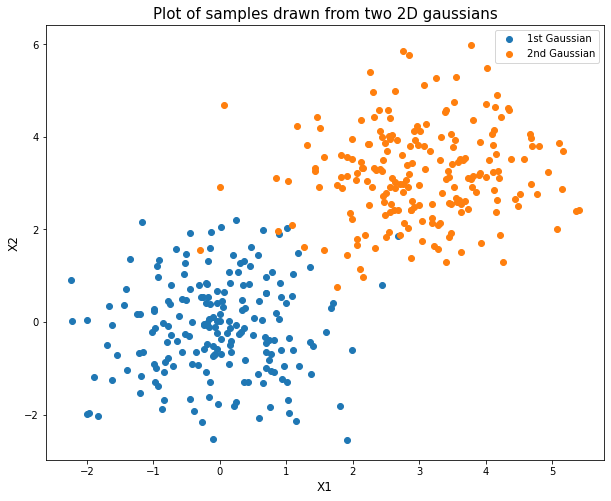

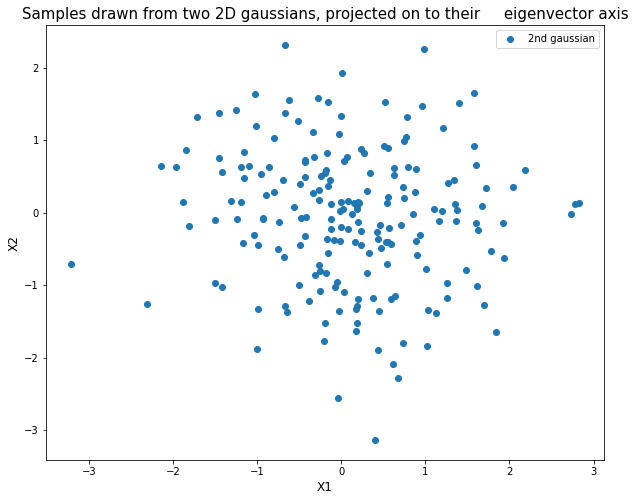

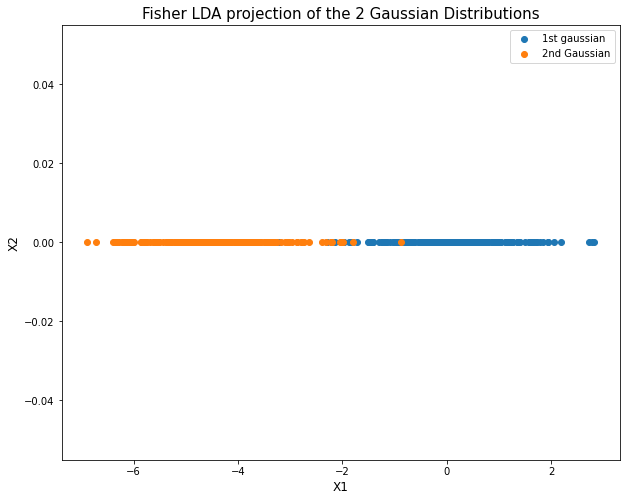

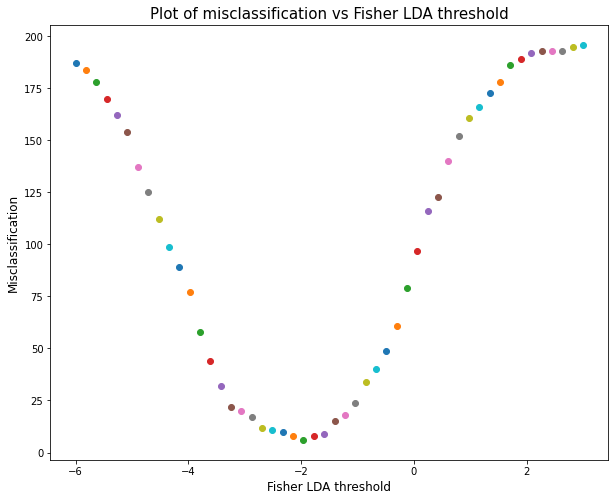


Best threshold is -1.9592 with 6 misclassifcations


In [ ]:
generate_GMM_samples(prior=0.5, number_of_samples=400, sig1=[[1,0],[0,1]],sig2=[[1,0],[0,1]],u1=[0,0],u2=[3,3])

<Figure size 864x864 with 0 Axes>

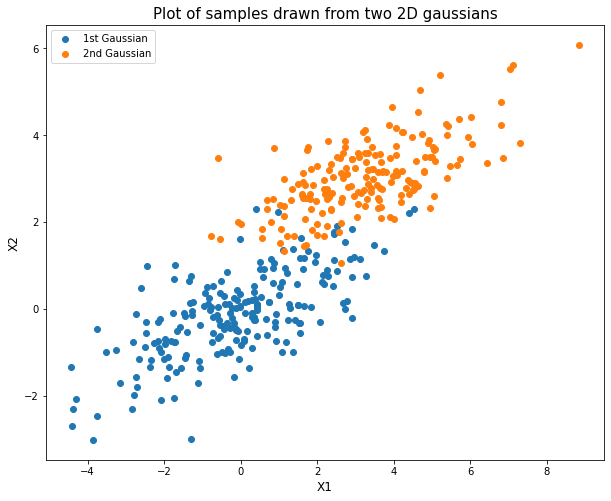

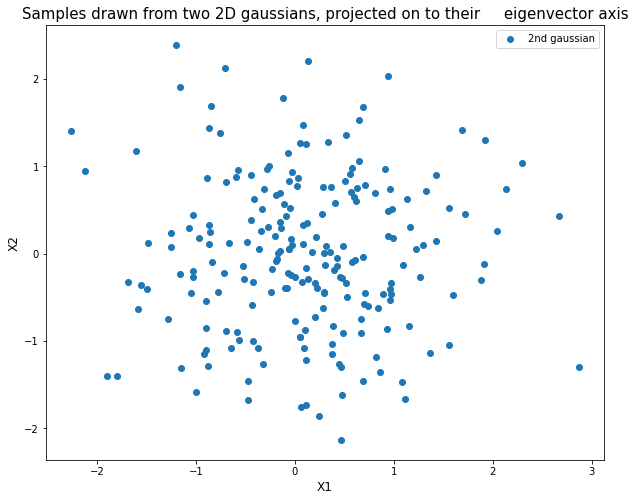

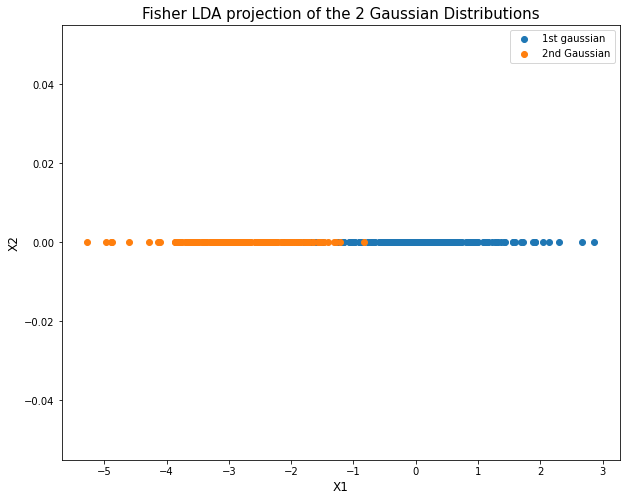

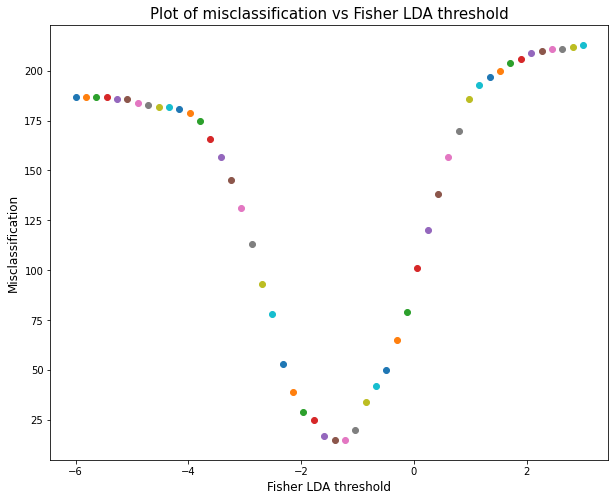


Best threshold is -1.4082 with 15 misclassifcations


In [ ]:
generate_GMM_samples(prior=0.5,sig1=[[3,1],[1,.8]],sig2=[[3,1],[1,.8]],u1=[0,0],u2=[3,3])

<Figure size 864x864 with 0 Axes>

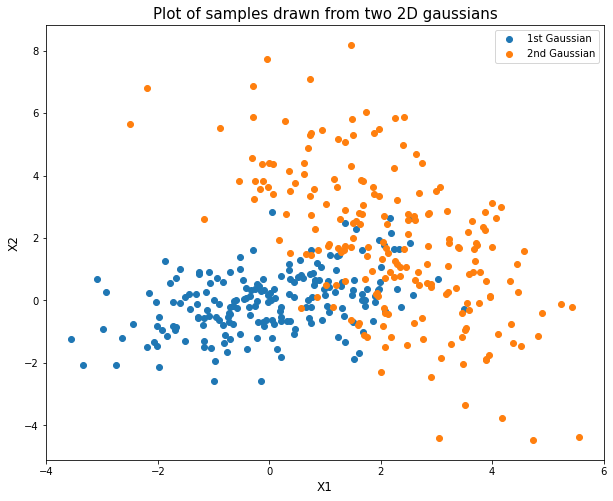

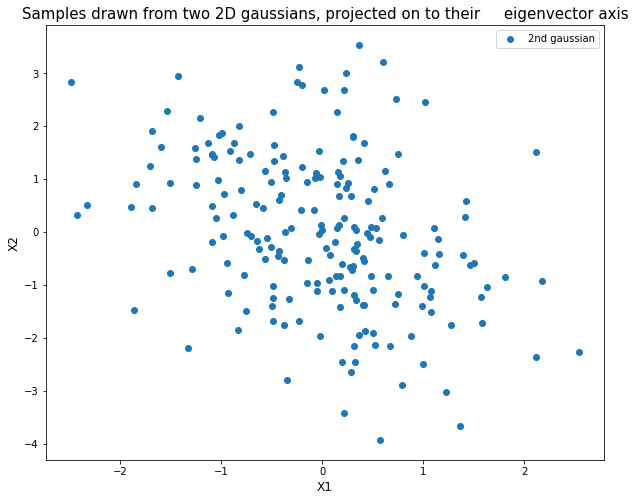

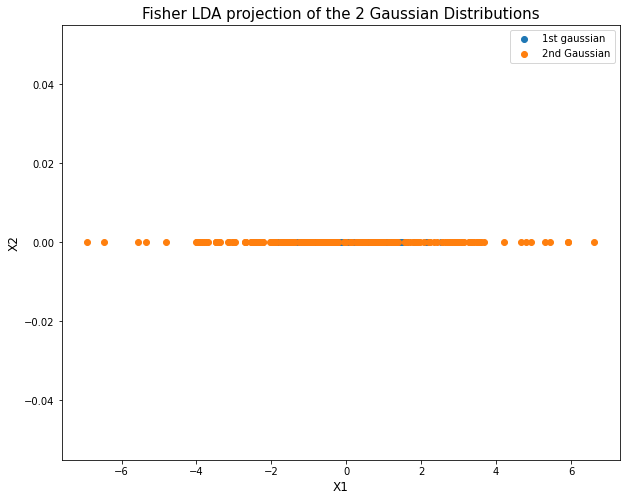

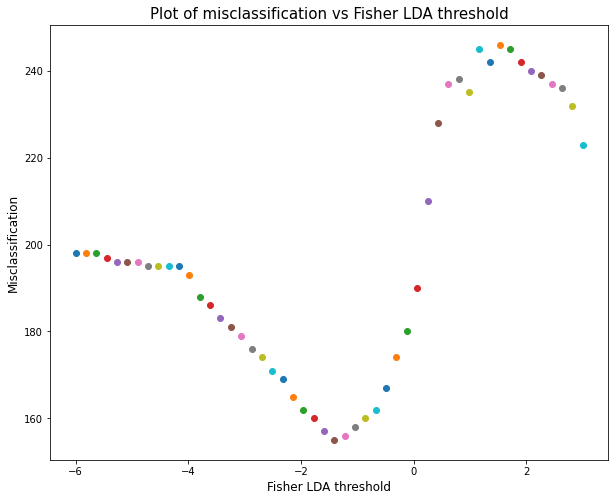


Best threshold is -1.4082 with 155 misclassifcations


In [ ]:
generate_GMM_samples(prior=0.5,sig1=[[2,.5],[.5,1]],sig2=[[2,-1.9],[-1.9,5]],u2=[2,2])

<Figure size 864x864 with 0 Axes>

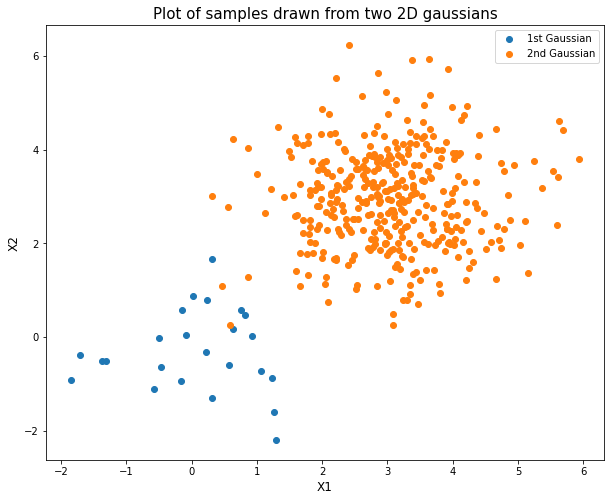

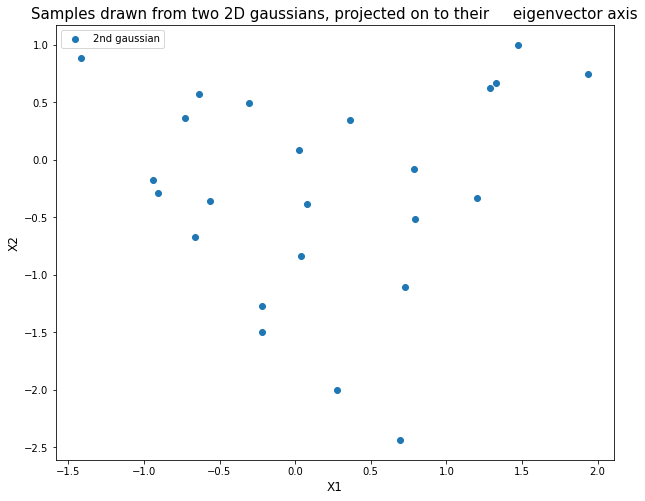

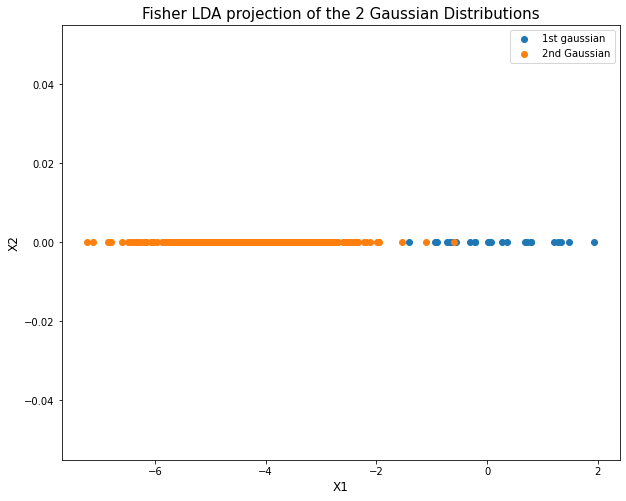

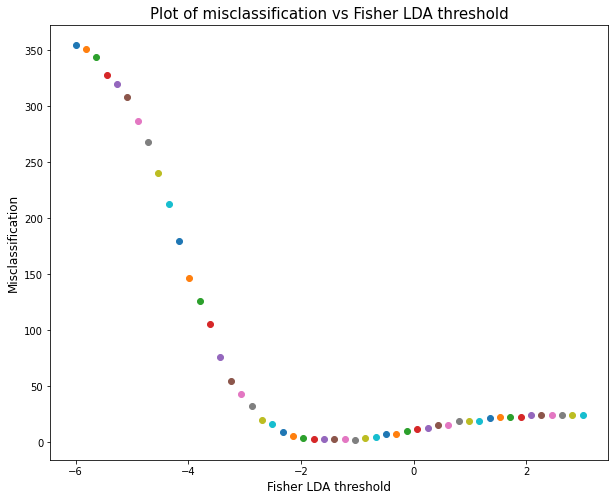


Best threshold is -1.0408 with 2 misclassifcations


In [ ]:
generate_GMM_samples(prior=0.05, sig1=[[1,0],[0,1]],sig2=[[1,0],[0,1]],u1=[0,0],u2=[3,3])

<Figure size 864x864 with 0 Axes>

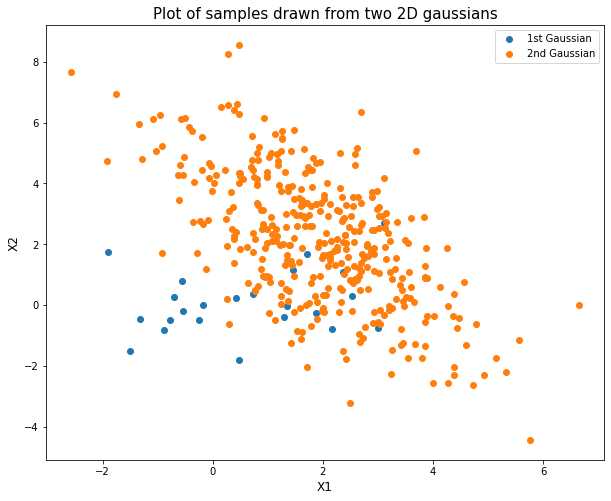

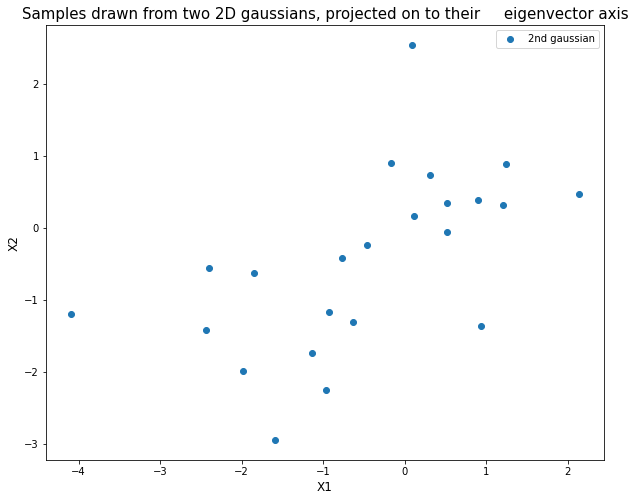

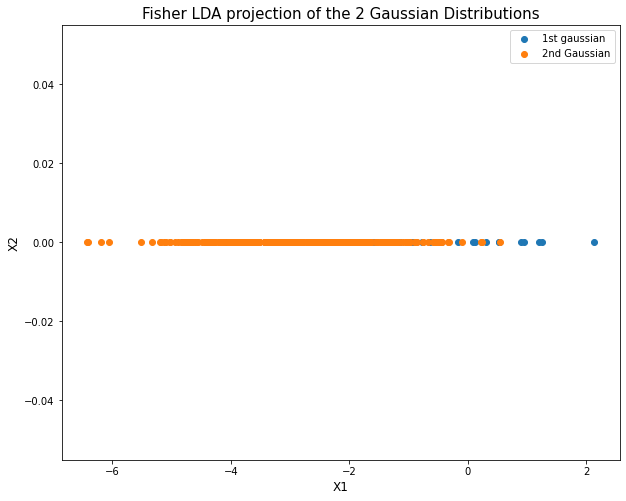

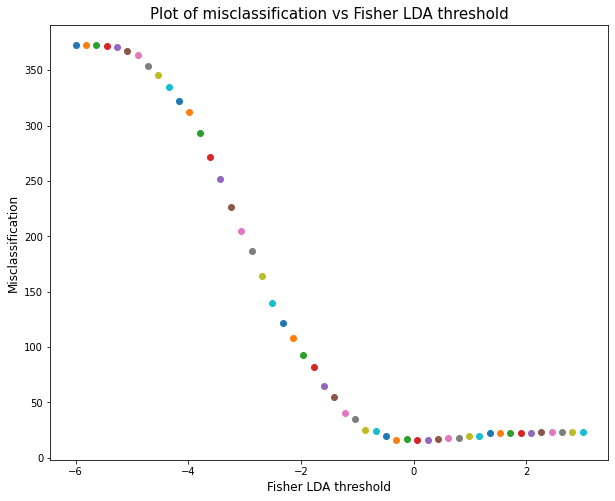


Best threshold is -0.3061 with 16 misclassifcations


In [ ]:
generate_GMM_samples(prior=0.05, sig1=[[2,.5],[.5,1]],sig2=[[2,-1.9],[-1.9,5]],u1=[0,0],u2=[2,2
                                                                                            ])

In [ ]:
'''
Sample from  multivariate gaussian. 2 ways. 
scipy.stat.multivariate_normal or np.random.multivariate_normal
'''

from scipy.stats import multivariate_normal as scipy_mvn
import numpy as np
import matplotlib.pyplot as plt


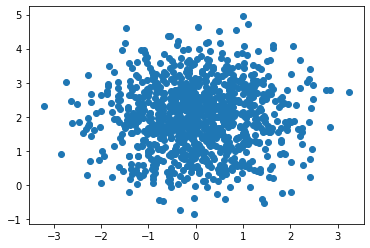

In [ ]:
mu = np.array([0,2])
cov = [[1,0],[0,1]]
r = scipy_mvn.rvs(mean=mu, cov=cov, size=1000)
plt.scatter(r[:,0],r[:,1]);

**The above can also be done by-**

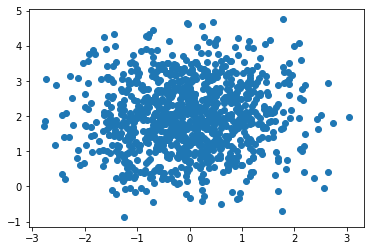

In [ ]:
r = np.random.multivariate_normal(mean=mu,cov=cov, size=1000)
plt.scatter(r[:,0], r[:,1])

In [ ]:
scipy_mvn.pdf?

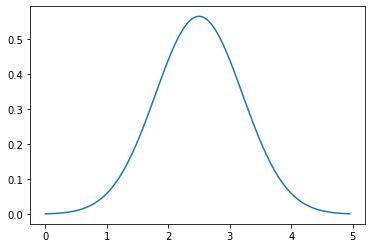

In [ ]:
x = np.linspace(0,5, 100, endpoint=False)
y = scipy_mvn.pdf(x, mean=2.5, cov=.5)
plt.plot(x,y);

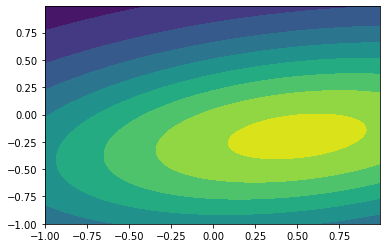

In [ ]:
x,y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x,y))
rv = scipy_mvn([.5,-.2],[[2.0,0.3],[.3,.5]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x,y, rv.pdf(pos));

In [ ]:
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm #color maps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import warnings
sns.set_style('darkgrid')
np.random.seed(42)

### Evaluate 1D gaussian at given x. Plot 1D gaussian

In [ ]:
'''Pdf of the univariate normal distribution'''

def univariate_normal(x, mean, variance):
    return ((1./np.sqrt(2*np.pi*variance))*np.exp(-(x-mean)**2/(2*variance)))

In [ ]:
#equivalently
'''
scipy_mvn.pdf(x, mean=2.5, cov=.5)
Same API
''';

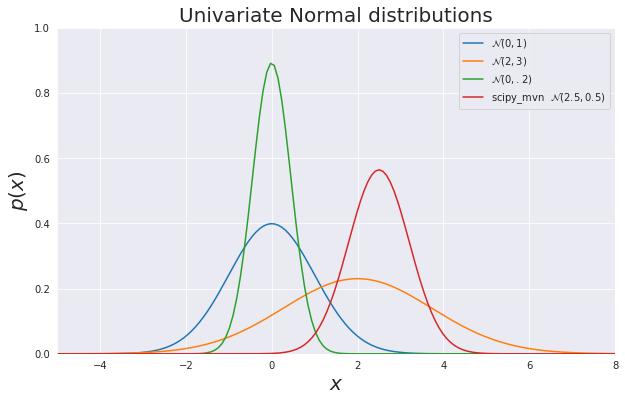

In [ ]:
#plots of different univariate normals
x = np.linspace(-5,8, num=150)
fig = plt.figure(figsize=(10,6))
plt.plot(x,univariate_normal(x, mean=0, variance=1), label="$\mathcal{N}(0,1)$");
plt.plot(x, univariate_normal(x, mean=2, variance=3),label="$\mathcal{N}(2,3)$");
plt.plot(x, univariate_normal(x,0,.2), label="$\mathcal{N}(0,.2)$");
plt.plot(x,scipy_mvn.pdf(x, 2.5, 0.5), label="scipy_mvn  $\mathcal{N}(2.5, 0.5)$")

plt.xlabel('$x$',fontsize=20)
plt.ylabel("$p(x)$",fontsize=20)
plt.title('Univariate Normal distributions',fontsize=20)
plt.ylim([0,1])
plt.xlim([-5,8])
plt.legend()
plt.show()

In [ ]:
"""
Pdf of the multivariate normal distributions.
"""

def multivariate_normal(x, d, mean, covariance):
    """
    Pdf of Multivariate Normal distributions
    Returns: the pdf of MVN
    """
    x_m = x- mean
    return (1. / (np.sqrt((2*np.pi)**d*np.linalg.det(covariance))) *
             np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m))/2))

In [ ]:
## Or equivalently use
"""
scipy_mvn.pdf(X, mean=2.5, cov=.5)
same API
""";

In [ ]:
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    grid_size = 100
    x1s = np.linspace(-5,5, num=grid_size)
    x2s = np.linspace(-5,5, num=grid_size)
    x1,x2 = np.meshgrid(x1s, x2s) #generate grid
    pdf = np.zeros((grid_size, grid_size))
    #fill the cost matrix for each combination of weights
    for i in range(grid_size):
        for j in range(grid_size):
            pdf[i,j] = multivariate_normal(np.matrix([[x1[i,j]], [x2[i,j]]]),
            d,mean,covariance)

    return x1, x2, pdf #x1, x2, pdf(x1,x2)
    

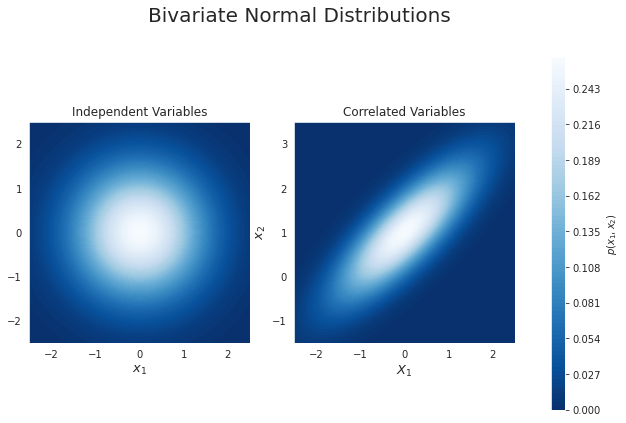

In [ ]:
#subplots
fig , (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
d = 2 #number of dimensions

#plot independent normals
bivariate_mean = np.matrix([[0.],[0.]]) #mean
bivariate_covariance = np.matrix([
    [1.,0.],
    [0.,1.]
]) #covariance

x1, x2, p = generate_surface(bivariate_mean,bivariate_covariance, d)

#plot bivariate distributions
cont = ax1.contourf(x1,x2, p, 100,cmap=cm.Blues_r)
ax1.set_xlabel('$x_1$',fontsize=13)
ax2.set_ylabel('$x_2$',fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent Variables', fontsize=12)


#plot correlated Normals
bivariate_mean = np.matrix([[0.],[1.]])
bivariate_covariance = np.matrix([
    [1.,0.8],
    [.8,1.]
]) #covariance
x1,x2,p = generate_surface(
    bivariate_mean,bivariate_covariance,d
)

#plot bivraite distributions
cont = ax2.contourf(x1,x2,p,100,cmap=cm.Blues_r)
ax2.set_xlabel('$X_1$',fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.axis([-2.5,2.5,-1.5,3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated Variables',fontsize=12)


#add a colorbar and title
fig.subplots_adjust(right=.8)
cbar_ax = fig.add_axes([.85,.15,.02,.7])
cbar = fig.colorbar(cont, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$',fontsize=10)
plt.suptitle('Bivariate Normal Distributions',fontsize=20,y=.95)
plt.show()